# Analiza zbioru danych "US births (2018)"

## Cel projektu
Celem projektu jest analiza zbioru danych dotyczącego urodzeń w Stanach Zjednoczonych w 2018 roku. 
W poszczególnych elementach analizy skupiliśmy się na sprawdzeniu, czy za pomocą uczenia maszynowego można przewidzieć:
* masę dziecka przy narodzinach
* metodę narodzin dziecka

## Zbiór danych oraz ich obróbka
Zbiór danych składa się z 3,8 miliona rekordów i 55 kolumn. Jest dostępny do wglądu i pobrania na stronie https://www.kaggle.com/des137/us-births-2018.

Opis kolumn na podstawie "User Guide to the 2018 Natality Public Use File", dostępne do pobrania:
https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

Na początku importujemy niezbędne biblioteki do wczytania zbioru danych.
Zmienna cols_to_keep zawiera nazwy wszystkich kolumn, jakie będziemy wczytywać.

In [198]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cols_to_keep = ['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DBWT', 
                'DLMP_MM', 'DLMP_YY', 'DMAR', 'DOB_MM', 'DOB_TT',
                'DOB_WK', 'DWgt_R', 'FAGECOMB', 'FRACE6', 'MAGER',
                'MRAVE6', 'M_Ht_In', 'NO_INFEC', 'NO_RISKS', 'PRIORDEAD',
                'PRIORLIVE', 'PRECARE', 'PREVIS', 'PWgt_R', 'RDMETH_REC',
                'RF_CESARN', 'SEX', 'WTGAIN']

Ze względu na dużą ilość danych, zmieniamy typy danych, aby ograniczyć ilość pamięci potrzebnej do działania na zbiorze.
Przykładowo, dane z zakresu 1 do 9 (jak kolumna "ATTEND") wymagają jedynie uint8, ale kolumna zawierająca dane z zakresu 227 do 9999 (kolumna DBWT) wymaga już uint16.

In [167]:
dtypes = \
    {'ATTEND': np.uint8, 'BFACIL': np.uint8, 'BMI': np.float32, 'CIG_0': np.uint8, 'DBWT': np.uint16,
     'DLMP_MM': np.uint8, 'DLMP_YY': np.uint16, 'DMAR': np.uint8, 'DOB_MM': np.uint8, 'DOB_TT': np.uint16,
     'DOB_WK': np.uint8, 'DWgt_R': np.uint16, 'FAGECOMB': np.uint8, 'FRACE6': np.uint8, 'MAGER': np.uint8,
     'MRAVE6': np.uint8, 'M_Ht_In': np.uint8, 'NO_INFEC': np.uint8, 'NO_RISKS': np.uint8, 'PRIORDEAD': np.uint8,
     'PRIORLIVE': np.uint8, 'PRECARE': np.uint8, 'PREVIS': np.uint8, 'PWgt_R': np.uint16, 'RDMETH_REC': np.uint8,
     'RF_CESARN': np.uint8, 'SEX': np.uint8, 'WTGAIN': np.uint8}

Wczytujemy dane do dataframe. Aby ułatwić pracę na kolumnie "płeć" (SEX), zmieniamy jej wartości z ('M', 'F') do (0, 1).

In [168]:
df = pandas.read_csv("US_births(2018).csv", delimiter=',', usecols=cols_to_keep, dtype=None)
df.loc[df['SEX'] == 'M', 'SEX'] = 0
df.loc[df['SEX'] == 'F', 'SEX'] = 1

C:\Users\Komputr\env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Za pomocą regexa zamieniamy wartość wszystkich pustych pól na 99 oraz ustawiamy typ danych za pomocą "df.astype()".
W dokumentacji zbioru możemy przeczytać, że nieznane wartości najczęściej wyrażają się za pomocą liczb 9, 99 lub 9999. Korzystając z tej informacji, usuwamy właśnie te rekordy, które zawierą
wyżej wymienione liczby. Oczywiście sprawdzamy wcześniej czy można to zrobić bez utraty ważnych rekordów.

In [171]:
df = df.replace(r'^\s*$', 99, regex=True)
df = df.astype(dtypes)

for column in range(0, len(df.columns)):
    df = df[df[df.columns[column]] != 99]
for column in ['ATTEND', 'BFACIL', 'DMAR', 'DOB_WK', 'FRACE6',
               'MRAVE6', 'NO_INFEC', 'NO_RISKS', 'RDMETH_REC']:
    df = df[df[column] != 9]
for column in ['DOB_TT', 'DLMP_YY', 'DBWT']:
    df = df[df[column] != 9999]

Poniżej znajduje się opis wybranych kolumn:

**ATTEND** - Asystent przy porodzie.<br>
**Wartości:**<br>
1 - doktor medycyny,<br>
2 - doktor osteopatii,<br>
3 - certyfikowana położna,<br>
4 - inna położna,<br>
5 - inne,<br>
9 - nieokreślone lub niepodane.<br>

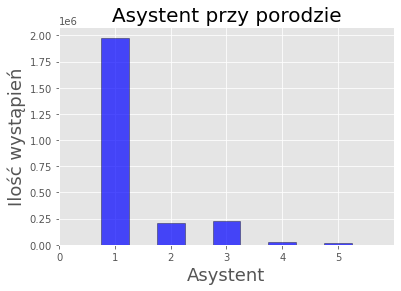

In [199]:
bins = np.arange(0,6) + 0.5
df.ATTEND.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=0.5, bins=bins)
plt.title('Asystent przy porodzie', size=20)
plt.xlabel('Asystent', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 6))
plt.xticks(bins - 0.5);

**BFACIL** - miejsce urodzenia.<br>
**Wartości:**<br>
1 - szpital,<br>
2 - centrum porodowe,<br>
3 - dom(zamierzone),<br>
4 - dom(niezamierzone),<br>
5 - dom(niewiadomo, czy zamierzone),<br>
6 - klinika/biuro doktora,<br>
7 - inne,<br>
9 - nieznane.

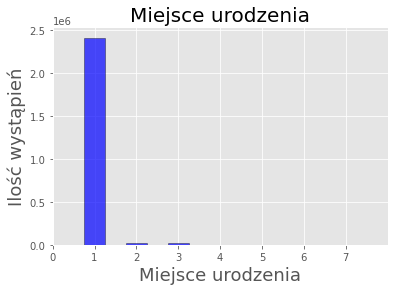

In [200]:
bins = np.arange(0,8) + 0.5
df.BFACIL.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=0.5, bins=bins)
plt.title('Miejsce urodzenia', size=20)
plt.xlabel('Miejsce urodzenia', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 8))
plt.xticks(bins - 0.5);

**BMI** - wartość BMI matki.<br>
**Wartości:** [13, 99]<br>
99 - nieznane.

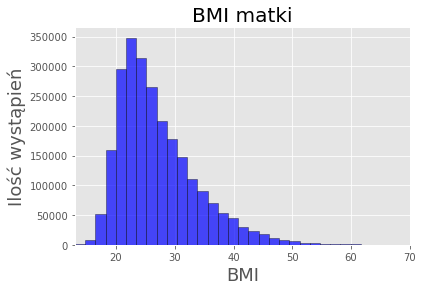

In [201]:
df.BMI.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=1, bins=50)
plt.title('BMI matki', size=20)
plt.xlabel('BMI', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((13, 70));

**CIG_0** - dzienne spożycie papierosów przed rozpoczęciem ciąży.<br>
**Wartości:** [0, 99]<br>
99 - nieznane.

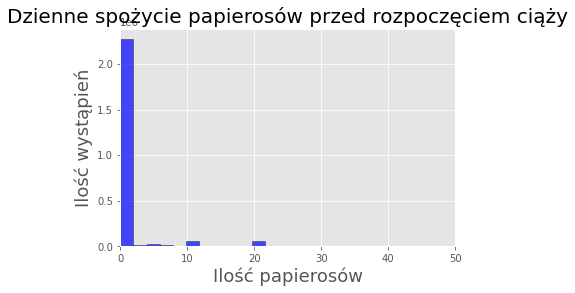

In [202]:
df.CIG_0.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=1, bins=50)
plt.title('Dzienne spożycie papierosów przed rozpoczęciem ciąży', size=20)
plt.xlabel('Ilość papierosów', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 50));

**DBWT** - waga noworodka wyrażona w gramach.<br>
**Wartości:** [227, 8165]<br>
9999 - nieznane.

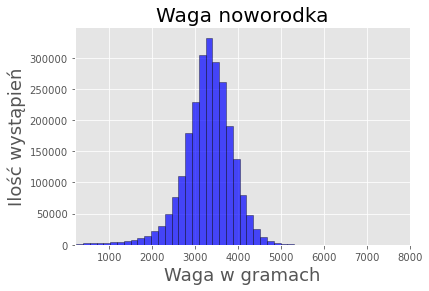

In [203]:
df.DBWT.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Waga noworodka', size=20)
plt.xlabel('Waga w gramach', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((200, 8000));

**DLMP_YY** - rok ostatniej miesiączki.<br>
**Wartości:** [2016, 2018]<br>
9999 - nieznane.

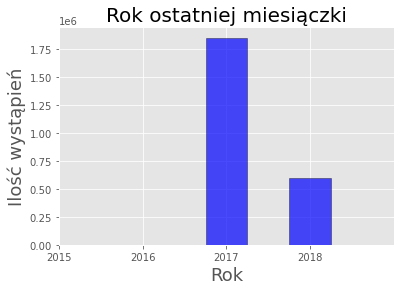

In [306]:
bins = np.arange(2015,2019) + 0.5
df.DLMP_YY.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=0.5, bins=bins)
plt.title('Rok ostatniej miesiączki', size=20)
plt.xlabel('Rok', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((2015, 2019))
plt.xticks(bins - 0.5);

**DMAR** - status cywilny matki.<br>
**Wartości:**<br>
1 - zamężna,<br>
2 - niezamężna.<br>

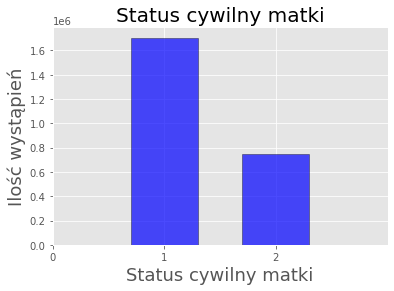

In [205]:
bins = np.arange(0,3) + 0.5
df.DMAR.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins, grid=True)
plt.title('Status cywilny matki', size=20)
plt.xlabel('Status cywilny matki', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 3))
plt.xticks(bins - 0.5);

**DOB_MM** - miesiąc urodzenia.<br>
**Wartości:** dyskretne od 1 do 12.<br>

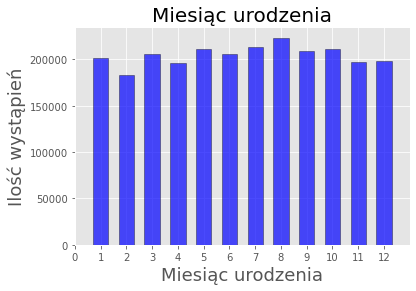

In [206]:
bins = np.arange(0,13) + 0.5
df.DOB_MM.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Miesiąc urodzenia', size=20)
plt.xlabel('Miesiąc urodzenia', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 13))
plt.xticks(bins - 0.5);

**DOB_TT** - czas urodzenia reprezentujący godzinę i minutę HHMM.<br>
**Wartości:** [0, 2400]<br>
9999 - nieznane.

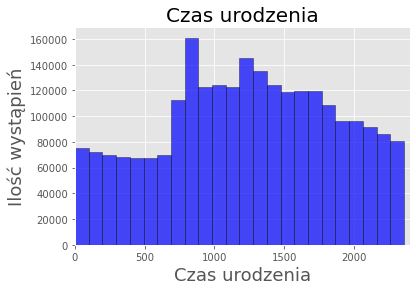

In [215]:
df.DOB_TT.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=24)
plt.title('Czas urodzenia', size=20)
plt.xlabel('Czas urodzenia', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 2400));

**DOB_WK** - dzień tygodnia urodzenia.<br>
**Wartości:** dyskretne od 1 do 7<br>

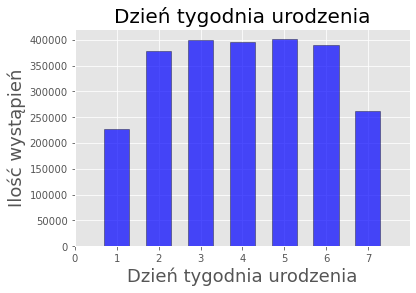

In [216]:
bins = np.arange(0,8) + 0.5
df.DOB_WK.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Dzień tygodnia urodzenia', size=20)
plt.xlabel('Dzień tygodnia urodzenia', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 8))
plt.xticks(bins - 0.5);

**DWgt_R** - waga kobiety w momencie porodu.<br>
**Wartości:** [100, 400]<br>
999 - nieznane.

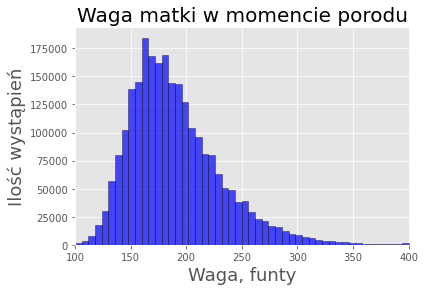

In [217]:
df.DWgt_R.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Waga matki w momencie porodu', size=20)
plt.xlabel('Waga, funty', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((100, 401));

**FAGECOMB** - wiek ojca.<br>
**Wartości:** [11, 99]<br>
99 - nieznane.

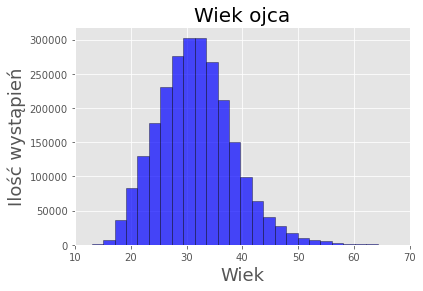

In [218]:
df.FAGECOMB.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=40)
plt.title('Wiek ojca', size=20)
plt.xlabel('Wiek', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((10, 70));

**FRACE6** – rasa ojca.<br>
**Wartości:**<br>
1 – biała(wyłącznie),<br>
2 - czarna(wyłącznie),<br>
3 - rdzenni Amerykanie i rdzenni mieszkańcy Alaski,<br>
4 - azjatycka(wyłącznie),<br>
5 – rdzenni mieszkańcy Hawajów i innych wysp Pacyfiku,<br>
6 – więcej niż jedna rasa,<br>
9 – nieznana lub niepodana.

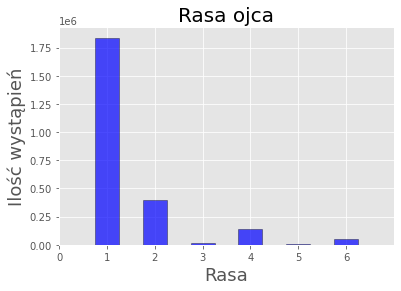

In [219]:
bins = np.arange(0,7) + 0.5
df.FRACE6.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=0.5, bins=bins)
plt.title('Rasa ojca', size=20)
plt.xlabel('Rasa', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 7))
plt.xticks(bins - 0.5);

**MAGER** - wiek matki.<br>
**Wartości:** [12, 50]<br>

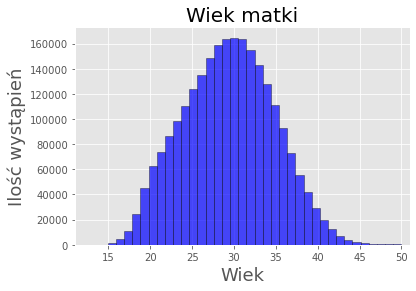

In [220]:
df.MAGER.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=39)
plt.title('Wiek matki', size=20)
plt.xlabel('Wiek', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((11, 51));

**MRAVE6** – rasa matki.<br>
**Wartości:**<br>
1 – biała(wyłącznie),<br>
2 - czarna(wyłącznie),<br>
3 - rdzenni Amerykanie i rdzenni mieszkańcy Alaski,<br>
4 - azjatycka(wyłącznie),<br>
5 – rdzenni mieszkańcy Hawajów i innych wysp Pacyfiku,<br>
6 – więcej niż jedna rasa,<br>
9 – nieznana lub niepodana.

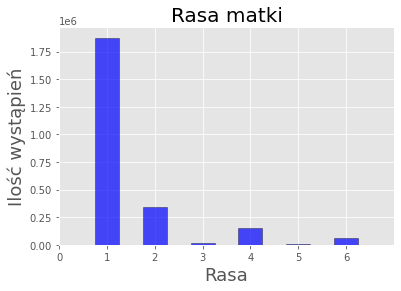

In [221]:
bins = np.arange(0,7) + 0.5
df.MRAVE6.plot(kind='hist', color='blue', edgecolor='black', alpha=.7, rwidth=0.5, bins=bins)
plt.title('Rasa matki', size=20)
plt.xlabel('Rasa', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 7))
plt.xticks(bins - 0.5);

**M_Ht_In** - wysokość matki w calach.<br>
**Wartości:** [30, 99]<br>
99 - nieznane.

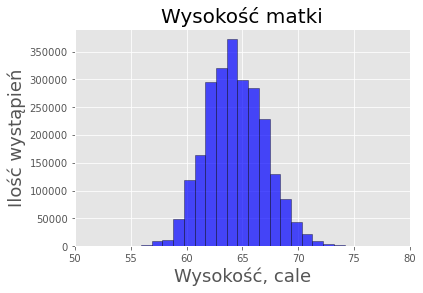

In [222]:
df.M_Ht_In.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Wysokość matki', size=20)
plt.xlabel('Wysokość, cale', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((50, 80));

**NO_INFEC** - brak odnotowanych infekcji.<br>
**Wartości:**<br>
0 - fałsz,<br>
1 - prawda,<br>
9 - nieznane.

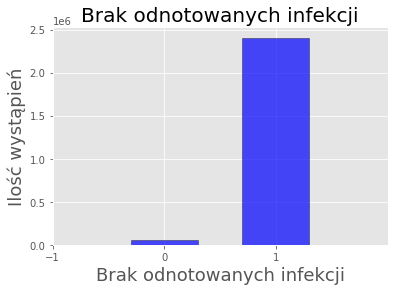

In [223]:
bins = np.arange(-1,2) + 0.5
df.NO_INFEC.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Brak odnotowanych infekcji', size=20)
plt.xlabel('Brak odnotowanych infekcji', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((-1, 2))
plt.xticks(bins - 0.5);

**NO_RISKS** - brak odnotowanych czynników ryzyka.<br>
**Wartości:**<br>
0 - fałsz,<br>
1 - prawda,<br>
9 - nieznane.

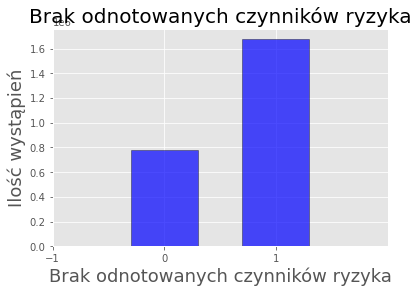

In [224]:
bins = np.arange(-1,2) + 0.5
df.NO_RISKS.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Brak odnotowanych czynników ryzyka', size=20)
plt.xlabel('Brak odnotowanych czynników ryzyka', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((-1, 2))
plt.xticks(bins - 0.5);

**PRECARE** - miesiąc rozpoczęcia opieki prenatalnej.<br>
**Wartości:** dyskretne od 1 do 9.<br>
99 - nieznane.

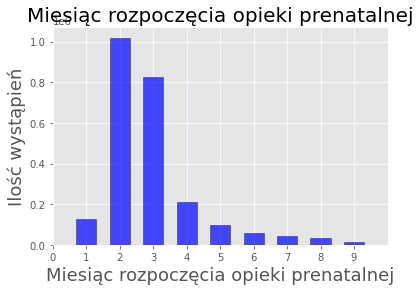

In [225]:
bins = np.arange(0,10) + 0.5
df.PRECARE.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Miesiąc rozpoczęcia opieki prenatalnej', size=20)
plt.xlabel('Miesiąc rozpoczęcia opieki prenatalnej', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 10))
plt.xticks(bins - 0.5);

**PREVIS** - ilość wizyt prenatalnych.<br>
**Wartości:** [0, 99]<br>
99 - nieznane.

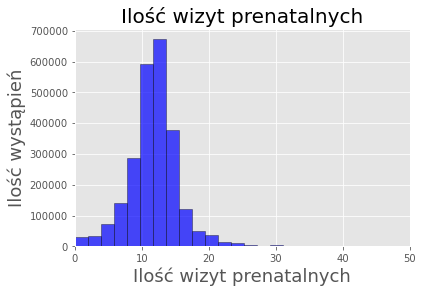

In [226]:
df.PREVIS.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Ilość wizyt prenatalnych', size=20)
plt.xlabel('Ilość wizyt prenatalnych', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 50));

**PWgt_R** - waga matki przed rozpoczęciem ciąży.<br>
**Wartości:** [75, 375]<br>
999 - nieznane.

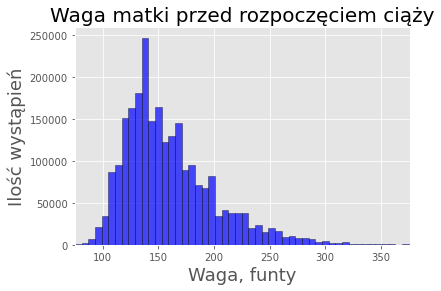

In [227]:
df.PWgt_R.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Waga matki przed rozpoczęciem ciąży', size=20)
plt.xlabel('Waga, funty', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((75, 376));

**RDMETH_REC** - metoda porodu. <br>
**Wartości:**<br>
1 - naturalna,<br>
2 - naturalna, z wcześniejszym cesarskim cięciem,<br>
3 - cesarskie cięcie (po raz pierwszy),<br>
4 - cesarskie cięcie (powtórzenie),<br>
5 - naturalna (wcześniejsza metoda porodu nieznana),<br>
6 - cesarskie cięcie (wcześniejsza metoda porodu nieznana),<br>
9 - nieznane.

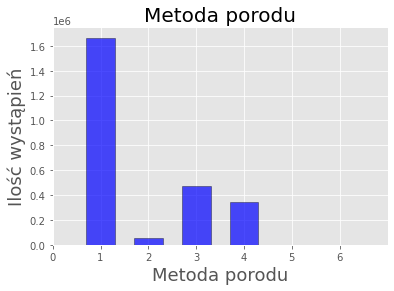

In [372]:
bins = np.arange(0,7) + 0.5
df.RDMETH_REC.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Metoda porodu', size=20)
plt.xlabel('Metoda porodu', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((0, 7))
plt.xticks(bins - 0.5);

**RF_CESARN** - ilość wcześniejszych cesarskich cięć.<br>
**Wartości:** [0, 30]<br>
99 - nieznane.

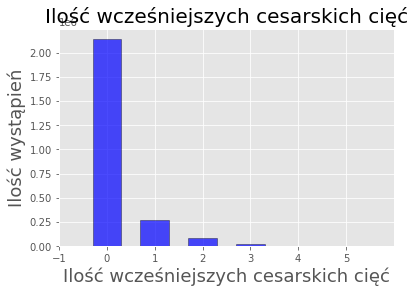

In [373]:
bins = np.arange(-1,6) + 0.5
df.RF_CESARN.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Ilość wcześniejszych cesarskich cięć', size=20)
plt.xlabel('Ilość wcześniejszych cesarskich cięć', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((-1, 6))
plt.xticks(bins - 0.5);

**SEX** - płeć noworodka.<br>
**Wartości:**<br>
0 - męska,<br>
1 - żeńska.<br>

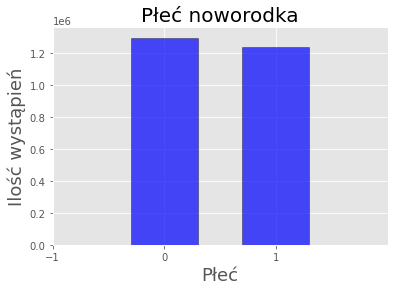

In [374]:
bins = np.arange(-1,2) + 0.5
df.SEX.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=.6, bins=bins)
plt.title('Płeć noworodka', size=20)
plt.xlabel('Płeć', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((-1, 2))
plt.xticks(bins - 0.5);

**WTGAIN** - przybrana waga w funtach.<br>
**Wartości:** [0, 99]<br>
99 - nieznane.

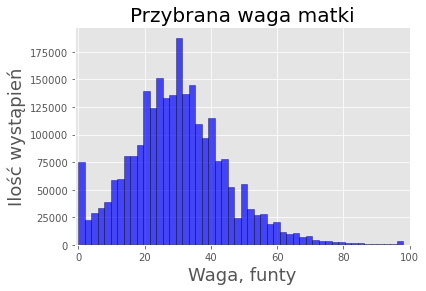

In [375]:
df.WTGAIN.plot(kind='hist', color='blue', edgecolor='black',alpha=.7, rwidth=1, bins=50)
plt.title('Przybrana waga matki', size=20)
plt.xlabel('Waga, funty', size=18)
plt.ylabel('Ilość wystąpień', size=18)
plt.xlim((-1, 100));

Chciałem też uprościć jedną z kolumn, która przechowuje wyniki, które chciałbym przewidzieć. Dotyczy ona
sposobu w jaki urodziło się dziecko. W tym przypadku nie interesowały mnie szczegóły lecz generalna konkluzja,
dlatego też uogólniłem kilka możliwych wyników do zaledwie dwóch przypadków.

In [376]:
output_list = []
for item in df['RDMETH_REC'].values:
    if item in [1, 2, 5]:
        output_list.append(1)
    else:
        output_list.append(2)

Ostateczne przygotowanie data frame. Tutaj składam wcześniej przygotowane kolumny w całość.

In [377]:
output_list = np.array(output_list).astype(np.uint8)
df = df.drop(['RDMETH_REC'], axis=1)
df.insert(11, 'RDMETH_REC', output_list)
column_list = df.columns.tolist()
column_list = column_list[0:11] + column_list[-1:] + [column_list[11]]
df = df[column_list]

## Przewidywanie metody narodzin dziecka za pomocą drzew decyzyjnych i redukcji wymiarów

In [239]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

Po przygotowaniu zbioru danych, mogę go podzielić na zbiór treningowy oraz testowy w proporcji 70%/30%.
Sprawdzałem kilka możliwości, ale taki stosunek wydaje się być najbardziej odpowiedni.

In [379]:
y = df.pop('RDMETH_REC')
y = y.to_numpy()
X = df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Mogę w końcu wytrenować model drzewa decyzyjnego. Aby jak najlepiej dobrać parametry, sprawdziłem najpierw,
jaka głębokość drzewa będzie najlepsza dla mojego przypadku.

In [380]:
get_depths, scores_test, scores_train = [], [], []
depths = np.arange(2, 27, 3)

In [381]:
for depth in depths:
    classifier = tree.DecisionTreeClassifier(random_state=0,
                                             max_depth=depth)
    classifier.fit(X_train, y_train)
    get_depths.append(classifier.get_depth())
    scores_test.append(classifier.score(X_test, y_test))
    scores_train.append(classifier.score(X_train, y_train))
get_depths = np.array(get_depths)
scores_test = np.array(scores_test)
scores_train = np.array(scores_train)
depth_score_combined = list(zip(scores_test, get_depths))
x_coord = max(depth_score_combined, key=lambda item:item[0])[1]
y_cord = np.max(scores_test)

Wyniki przedstawię na wykresie:

ok


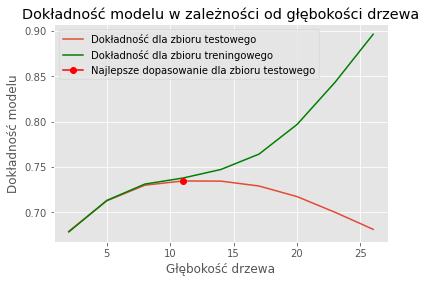

In [382]:
fig, ax = plt.subplots()
ax.plot(get_depths, scores_test, label='Dokładność dla zbioru testowego')
ax.plot(get_depths, scores_train, color='green', label='Dokładność dla zbioru treningowego')
ax.plot(x_coord, y_cord, marker='o', color='red', label='Najlepsze dopasowanie dla zbioru testowego')
ax.set_title('Dokładność modelu w zależności od głębokości drzewa')
ax.set_xlabel('Głębokość drzewa')
ax.set_ylabel('Dokładność modelu')
ax.legend();
print("ok")

Na wykresie można zobaczyć, że najlepiej radzi sobie model z głębokością drzewa równą 8. Później model
ulega przetrenowaniu i zbyt mocno generalizuje wyniki.

Stworzenie modelu drzewa decyzyjnego oraz trening na zbiorze.

In [383]:
tree_classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=8).fit(X_train, y_train)

Możemy sprawdzić jak dobrze poradził sobie model

In [384]:
result_train = tree_classifier.score(X_train, y_train)
result_test = tree_classifier.score(X_test, y_test)
print(f'Train set accuracy: {result_train} Test set accuracy: {result_test}')

Train set accuracy: 0.7311343540985235 Test set accuracy: 0.7299043626083213


Model osiągnął 80% dokładności. Być może nie jest to imponująca wartość, ale mówi nam, że na pewno istnieje 
jakaś korelacja między wybranymi argumentami a wynikiem końcowym.

Teraz chciałbym sprawdzić czy redukcja wymiaru może poprawić dokładność wcześniej wytrenowanego modelu. W tym
celu wykorzystam metodę PCA czyli analizę składowych głównych.

In [385]:
in_pca = IncrementalPCA(batch_size=20)
X_pca = in_pca.fit(X_train)

Aby zobaczyć ile składowych głównych powinniśmy wybrać, możemy skorzystać z poniższych właściwości klasy
IncrementalPCA. Pierwsza tablica pokazuje jaką część zmienności danych wyjaśnia każdy argument. W drugiej
tablicy są przechowywane wartości, które mówią jaki % zmienności wyjściowego modelu wyjaśnia kolejne n składowych.

In [386]:
explained_variance = in_pca.explained_variance_ratio_
print(explained_variance)
total_sum = np.cumsum(in_pca.explained_variance_ratio_)
print(total_sum)

[5.28120658e-01 4.69250716e-01 2.21842174e-03 2.94558046e-04
 6.00478150e-05 2.72706272e-05 1.55407908e-05 7.19723009e-06
 4.50416839e-06 7.45402938e-07 2.51870469e-07 8.96548924e-08]
[0.52812066 0.99737137 0.9995898  0.99988435 0.9999444  0.99997167
 0.99998721 0.99999441 0.99999891 0.99999966 0.99999991 1.        ]


Możemy też skorzystać z graficznej metody czyli tak zwanego wykresu osypiska. Miejsce załamania wykresu mówi nam
ile składowych powinniśmy wybrać.

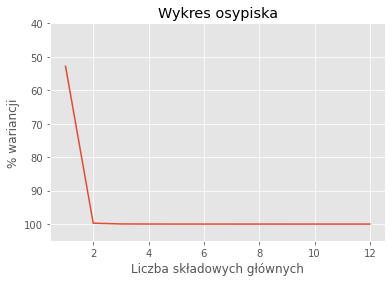

In [387]:
arguments = np.arange(1, X[0].size + 1)
fig, ax = plt.subplots()
ax.plot(arguments, total_sum * 100)
ax.set_title('Wykres osypiska')
ax.set_ylim(105, 40)
ax.set_xlabel('Liczba składowych głównych')
ax.set_ylabel('% wariancji');

Na wykresie wyraźnie widać moment załamania, możemy z niego wywnioskować, że powinniśmy wybrać 5 lub
maksymalnie 6 składowych.

Wiem już ile składowych powinien wykorzystywać model drzewa decyzyjnego. Teraz mogę zredukować wymiar składowych
i sprawdzić jak poradzi sobie model drzewa.

In [388]:
train_PCA = StandardScaler().fit_transform(X_train)
test_PCA = StandardScaler().fit_transform(X_test)
in_pca = IncrementalPCA(batch_size=20, n_components=6)
principal_components = in_pca.fit_transform(train_PCA)
test_PCA = in_pca.transform(test_PCA)
tree_classifier.fit(principal_components, y_train)
result_train_PCA = tree_classifier.score(principal_components, y_train)
result_test_PCA = tree_classifier.score(test_PCA, y_test)
print(f'Train set accuracy: {result_train_PCA} Test set accuracy: {result_test_PCA}')

Train set accuracy: 0.6891587152173472 Test set accuracy: 0.6886787608090794


Wyniki mogą być lekko zaskakujące, ale widać, że zredukowanie wymiaru zbioru negatywnie wpłynęło
na dokładność modelu. Może to być spowodowane tym, że metoda PCA całkowice przekształca zbiór danych na odpowiedni
zbiór wektorów, a każda większa zmiana może mieć olbrzymi wpływ na decyzje drzewa.

Ostatnim krokiem będzie sprawdzenie czy model jest w stanie przewidzieć w jaki sposób urodzi się dziecko na
podstawie pewnych informacji.

In [389]:
tree_classifier.fit(X_train, y_train)
child_1 = np.array([30.7, 0, 31, 1, 30, 1, 1, 3, 8, 0, 1, 0]).reshape(1, -1)
child_2 = np.array([33.3, 2, 35, 3, 35, 3, 0, 3, 9, 0, 2, 2]).reshape(1, -1)
print(tree_classifier.predict(child_1)[0])
print(tree_classifier.predict(child_2)[0])

1
1


### Wnioski
    
Model poprawnie rozpoznał dwa podane przypadki. Należy jednak pamiętać, że dokładność modelu wynosi
zaledwie 80%. Istnieje więc dość spore prawdopodobieństwo na błędne przypisanie przypadku do metody porodu.
Na moje potrzeby jest to wynik wystarczający aczkolwiek na pewno dałoby się wykorzystać inne metody, które
dałyby lepsze wyniki.

## Przewidywanie masy dziecka przy narodzinach za pomocą regresji logistycznej

Celem tej analizy będzie sprawdzenie, czy za pomocą uczenia maszynowego jesteśmy w stanie przewidzieć, czy dziecko w czasie narodzin będzie ważyło poniżej 2500g. Dzieci, które mają masę poniżej 2500g są klasyfikowane jako mające niedowagę, i są narażone na większe ryzyko w przyszłości niż dzieci z prawidłową wagą.

Zaimportujemy niezbędne biblioteki do analizy i wizualizacji danych.

In [260]:
from scipy import stats
import seaborn

Stworzymy kopię głównego dataframe'a, do której zaimportujemy tylko niektóre kolumny.

In [357]:
df_m = df[['DLMP_YY', 'DLMP_MM', 'CIG_0', 'BMI', 'DBWT',
           'DWgt_R', 'MAGER', 'M_Ht_In', 'PREVIS', 'PWgt_R',
           'RF_CESARN', 'WTGAIN', 'NO_RISKS', 'NO_INFEC',
           'SEX', 'DOB_MM']].copy()

Zanim zaczniemy analizę, stworzymy dodatkową kolumnę - długość trwania ciąży. Długość ciąży można obliczyć na podstawie dostępnych danych - "DLMP_MM" oraz "DLMP_MM" dotyczących roku i miesiąca ostatniej miesiączki, oraz "DOB_MM" dotyczącej miesiąca urodzenia dziecka.

In [358]:
def gestation(row):
    if row['DLMP_YY'] == 2018:
        return row['DOB_MM'] - row['DLMP_MM']
    if row['DLMP_YY'] == 2017 or row['DLMP_YY'] == 2016:
        return 12 + row['DOB_MM'] - row['DLMP_MM']

Dodajemy kolumnę do DataFrame'a.

In [359]:
df_m['GST_TIME'] = df_m.apply(lambda row: gestation(row), axis=1)

Zwizualizujemy sobie zależność między długością ciąży a wagą dziecka:

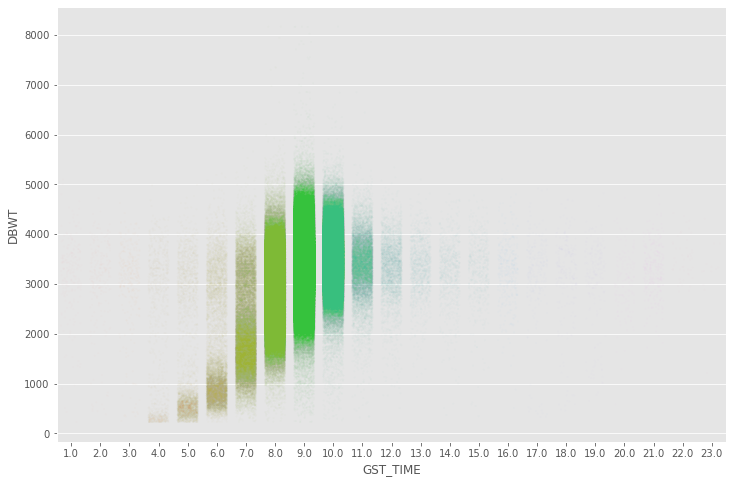

In [360]:
plt.figure(figsize = (12,8))
seaborn.stripplot(x=df_m['GST_TIME'], y=df_m['DBWT'], size=2, alpha=.02, jitter=.35);

Ze względu na błędy we wpisanym roku, usuniemy wszystkie rekordy gdzie czas trwania ciąży wyszedł mniejszy niż 4 lub większy niż 12.

In [361]:
df_m = df_m[(df_m.GST_TIME > 3) & (df_m.GST_TIME < 12)]

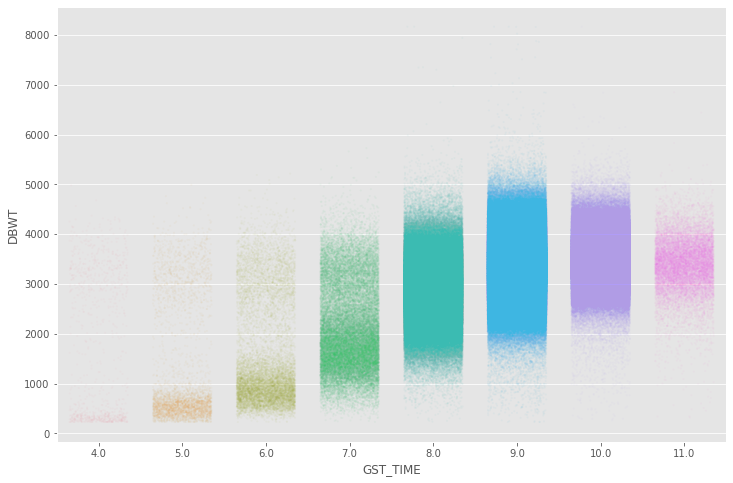

In [364]:
plt.figure(figsize = (12,8))
seaborn.stripplot(x=df_m['GST_TIME'], y=df_m['DBWT'], size=2, alpha=.05, jitter=.35);

Możemy już usunąć kolumny 'DLMP_YY', 'DLMP_MM' oraz 'DOB_MM'.

In [365]:
df_m = df_m.drop(['DLMP_YY', 'DLMP_MM', 'DOB_MM'], axis=1);

Zmienimy również kolumnę CIG_0 tak, aby wyrażała tylko wartości 0 (osoba niepaląca) lub 1 (osoba paląca).

In [366]:
df_m['CIG_0'] = df.CIG_0.apply(lambda x: 0 if x == 0 else 1)

Aby móc wytrenować model regresji logistycznej, muszą być spełnione pewne warunki. Niektóre z nich to:
* binarna regresja logistyczna wymaga, aby zmienna zależna była wartością binarną,
* pomiędzy zmiennymi niezależnymi nie ma dużej współzależności.

Aby sprawdzić, czy między zmiennymi nie ma współzależności, zrobimy macierz korelacji naszych zmiennych.

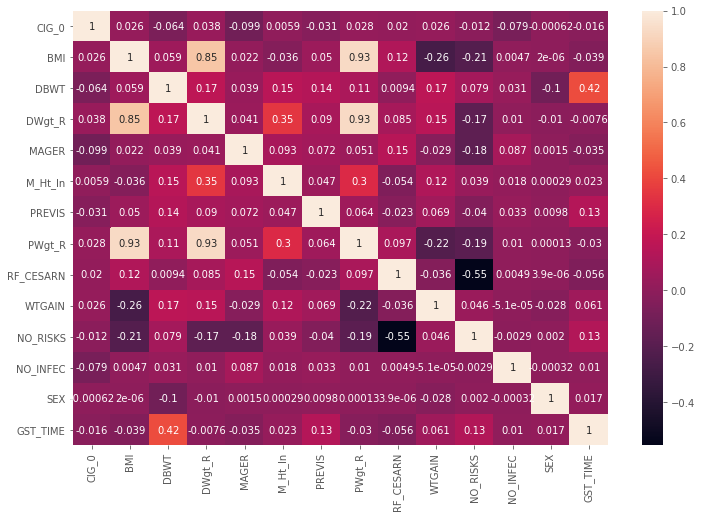

In [367]:
correlation_matrix = df_m.corr()
plt.figure(figsize = (12,8))
seaborn.heatmap(correlation_matrix, annot=True);

Z rysunku powyżej możemy wywnioskować:
* BMI jest silnie powiązane z wagą matki przed ciążą i przed porodem, co oczywiste, jako że BMI jest zależne od wagi matki. W związku z tym z dalszej analizy usuniemy BMI jako zmienną współzależną,
* liczba wcześniejszych cesarskich cięć jest ujemnie skorelowana w stosunku do występujących czynników ryzyka,
* czas trwania ciąży (GST_TIME) jest skorelowany z wagą dziecka.

In [368]:
df_m = df_m.drop("BMI", axis=1);

Aby przewidzieć, czy dziecko będzie ważyło poniżej 2500g, zmienimy wartości w kolumnie 'DBWT' na 0 jeśli dziecko waży powyżej 2500g, oraz na 1 jeśli dziecko waży poniżej 2500g.

In [369]:
df_m['DBWT'] = df.DBWT.apply(lambda x: 0 if x > 2500 else 1)

Naszymi zmiennymi niezależnymi są wszystkie zmienne zaimportowane do DataFrame'a df_m za wyjątkiem wagi dziecka (DBWT).

Naszą zmienną zależną, którą chcemy przewidzieć, jest waga dziecka, wyrażona już jako 0 lub 1.

In [370]:
from sklearn.linear_model import LogisticRegression

x = df_m.drop(['DBWT'], axis=1)
y = df_m['DBWT']

Dzielimy dane na treningowe oraz testowe w proporcji 7/3.

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Aby przyspieszyć czas uczenia, zmniejszymy wymiar danych za pomocą IncrementalPCA. Zrobimy wykres osypiska aby sprawdzić ile zmiennych jest potrzebnych aby wystarczająco wyjaśnić dane.

[0.89302829 0.98503208 0.99353249 0.99765655 0.9995012  0.99964806
 0.99977271 0.99987723 0.99994531 0.99997543 0.99999463 1.        ]


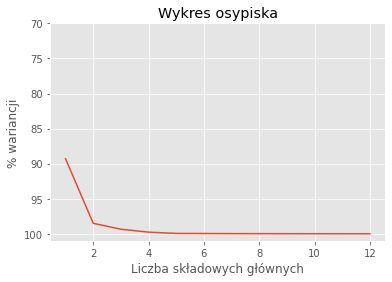

In [372]:
in_pca = IncrementalPCA(batch_size=20)
x_pca = in_pca.fit(x_train)
total_sum = np.cumsum(in_pca.explained_variance_ratio_)
print(total_sum)

arguments = np.arange(1, 13)
fig, ax = plt.subplots()
ax.plot(arguments, total_sum * 100)
ax.set_title('Wykres osypiska')
ax.set_ylim(101, 70)
ax.set_xlabel('Liczba składowych głównych')
ax.set_ylabel('% wariancji');

Wykres się 'wypłaszcza' około 5 składowych, więc tyle zostało przyjęte w dalszej analizie.

In [373]:
train_PCA = StandardScaler().fit_transform(x_train)
test_PCA = StandardScaler().fit_transform(x_test)
in_pca = IncrementalPCA(batch_size=20, n_components=5)
principal_components = in_pca.fit_transform(train_PCA)
test_PCA = in_pca.transform(test_PCA)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(principal_components, y_train)

result_train_PCA = logreg.score(principal_components, y_train)
result_test_PCA = logreg.score(test_PCA, y_test)
print(f'Dokładność zbioru treningowego: {result_train_PCA} Dokładność zbioru testowego: {result_test_PCA}')

Dokładność zbioru treningowego: 0.9296926553804288 Dokładność zbioru testowego: 0.9296120672035318


### Wnioski

Otrzymaliśmy dość wysoką dokładność 92.9%. Jest to zadowolająca wysokość. Może być.